# Misophonia Data Analysis Outline

## 1. Linear Regression
- Model building
- Assumptions check
- Model evaluation
    - R-squared
    - Mean Squared Error (MSE)
- Interpretation of results

## 2. Machine Learning
- Data splitting (train/test)
- Model selection
    - Decision Trees
    - Random Forest
    - Support Vector Machines
    - Neural Networks
- Model training and evaluation
    - Accuracy
    - Precision, Recall, F1-Score
    - ROC-AUC
- Hyperparameter tuning
- Model comparison



First, the angle of the jaw and anxiety

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
df = pd.read_excel('https://github.com/MMRES-PyBootcamp/MMRES-python-bootcamp2024/raw/master/datasets/misophonia_data.xlsx')
df

,Misofonia,Misofonia.dic,Estado,Estado.dic,ansiedad.rasgo,ansiedad.rasgo.dic,ansiedad.estado,ansiedad.estado.dic,ansiedad.medicada,ansiedad.medicada.dic,...,Edad,CLASE,Angulo_convexidad,protusion.mandibular,Angulo_cuelloYtercio,Subnasal_H,cambio.autoconcepto,Misofonia.post,Misofonia.pre,ansiedad.dif
0,si,4.0,divorciado,2.0,99.0,1.0,99.0,1.0,no,0.0,...,44.0,III,7.97,13.0,89.6,1.5,1.0,21.0,14.0,0.0
1,si,2.0,casado,1.0,75.0,1.0,75.0,1.0,no,0.0,...,43.0,II,18.23,-5.0,107.2,7.3,0.0,14.0,13.0,0.0
2,no,0.0,divorciado,2.0,77.0,1.0,55.0,0.0,no,0.0,...,24.0,I,12.27,11.5,101.4,5.0,NaN,NaN,NaN,-22.0
3,si,3.0,casado,1.0,95.0,1.0,99.0,1.0,no,0.0,...,33.0,III,7.81,16.8,75.3,2.7,1.0,NaN,NaN,4.0
4,no,0.0,casado,1.0,30.0,0.0,40.0,0.0,no,0.0,...,41.0,I,9.81,33.0,105.5,6.0,NaN,NaN,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,15.0,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,12.0,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN


Correlation: -0.36266540270933073


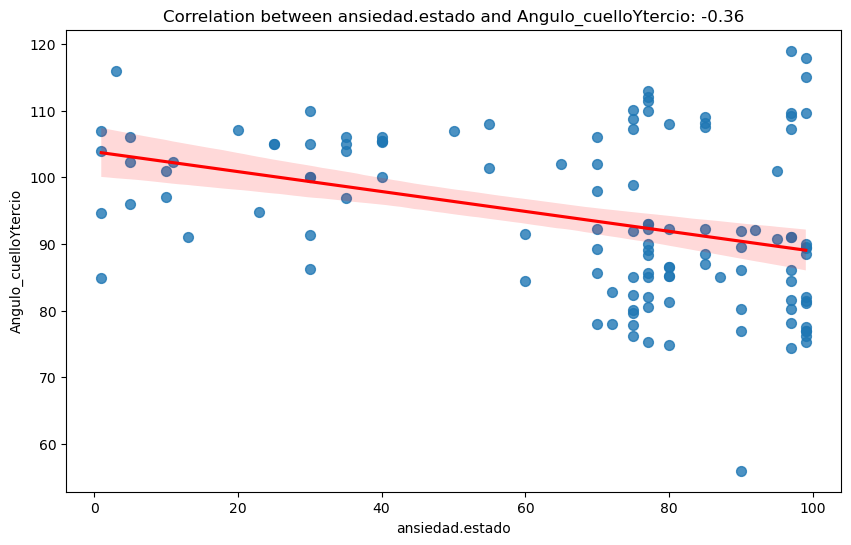

In [7]:
# Calculate the correlation
correlation = df['ansiedad.estado'].corr(df['Angulo_cuelloYtercio'])
print(f"Correlation: {correlation}")

# Plot the data
plt.figure(figsize=(10, 6))
sns.regplot(x='ansiedad.estado', y='Angulo_cuelloYtercio', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title(f'Correlation between ansiedad.estado and Angulo_cuelloYtercio: {correlation:.2f}')
plt.xlabel('ansiedad.estado')
plt.ylabel('Angulo_cuelloYtercio')
plt.show()

ANOVA F-statistic: 0.6801448948991973
ANOVA p-value: 0.5658744225892609


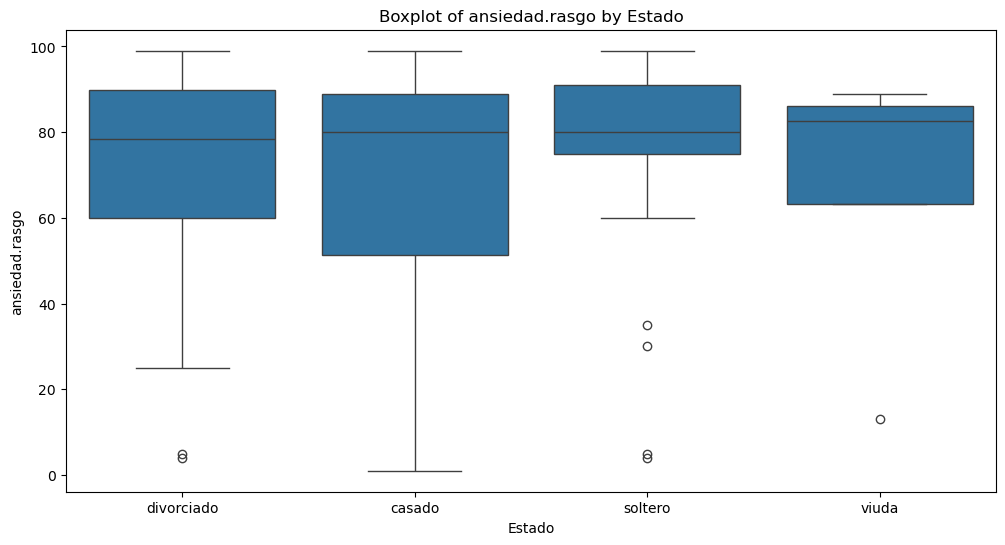

In [10]:
from scipy.stats import f_oneway

# Perform ANOVA test
estado_groups = [group['ansiedad.rasgo'].values for name, group in df.groupby('Estado')]
anova_result = f_oneway(*estado_groups)

# Output the statistics
print(f"ANOVA F-statistic: {anova_result.statistic}")
print(f"ANOVA p-value: {anova_result.pvalue}")

# Set Seaborn theme and context for consistency with previous style
sns.set_theme(style="whitegrid")
sns.set_context("talk", font_scale=1.2)

# Create figure and axis with larger dimensions for clarity
plt.figure(figsize=(12, 7), dpi=100)

# Boxplot with enhanced color palette
sns.boxplot(x='Estado', y='ansiedad.rasgo', data=df, palette='Set2', linewidth=2.5)

# Title and labels with enhanced font properties
plt.title('Boxplot of ansiedad.rasgo by Estado', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Estado', fontsize=14, labelpad=15)
plt.ylabel('ansiedad.rasgo', fontsize=14, labelpad=15)

# Lighten grid and remove top/right spines for a cleaner look
plt.grid(True, color='gray', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.show()

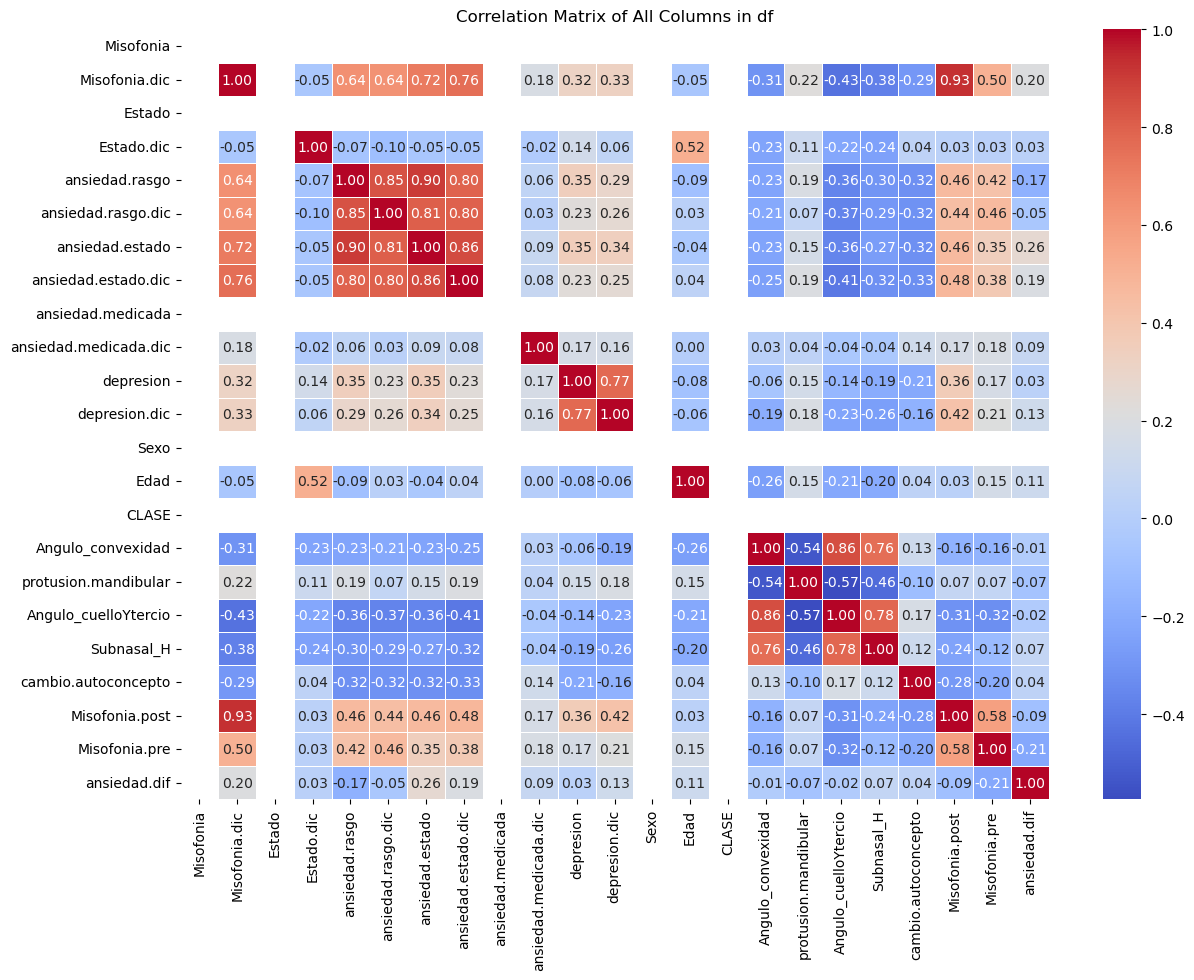

In [12]:
# Convert non-numeric columns to numeric where possible, or drop them
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Display the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of All Columns in df')
plt.show()

Correlation: 0.5197967083412559
P-value: 7.22751858361903e-10


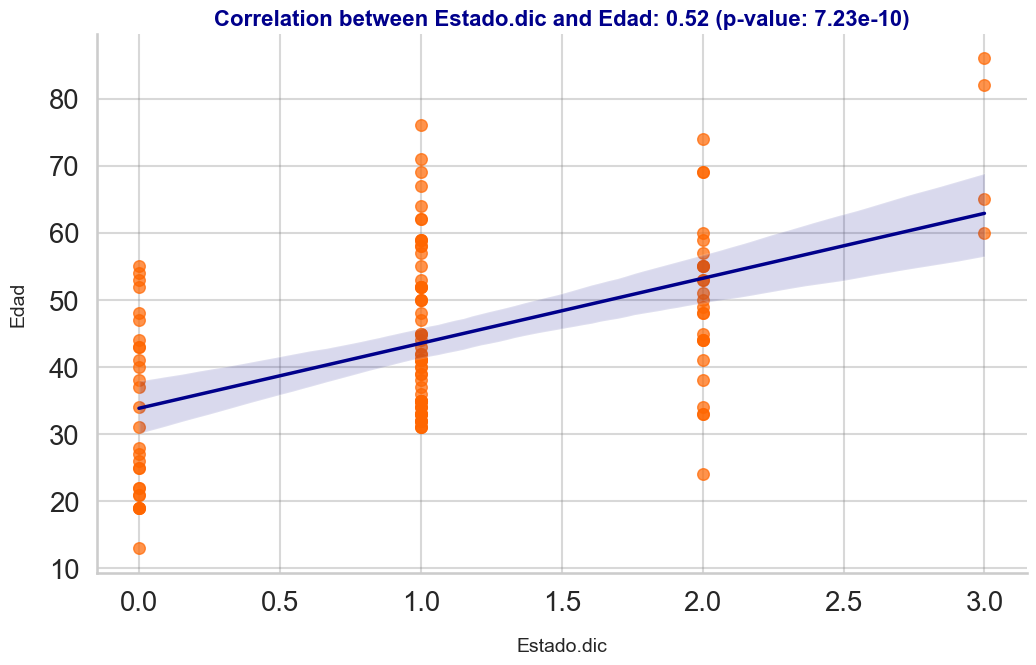

In [20]:
# Calculate the correlation
# Calculate the correlation
correlation = df['Estado.dic'].corr(df['Edad'])
print(f"Correlation: {correlation}")

# Compute the p-value
n = df[['Estado.dic', 'Edad']].dropna().shape[0]
t_stat = correlation * np.sqrt((n - 2) / (1 - correlation**2))
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))
print(f"P-value: {p_value}")

sns.set_theme(style="whitegrid")
sns.set_context("talk", font_scale=1.2)

# Create figure and axis with larger dimensions for clarity
plt.figure(figsize=(12, 7), dpi=100)

# Scatterplot with regression line
sns.regplot(x='Estado.dic', y='Edad', data=df, 
            scatter_kws={'s': 70, 'alpha': 0.7, 'color': '#ff6600'}, # New scatter color (orange)
            line_kws={'color': 'darkblue', 'lw': 2.5})               # New regression line color (blue)

# Title and labels with enhanced font properties
plt.title(f'Correlation between Estado.dic and Edad: {correlation:.2f} (p-value: {p_value:.2e})',
          fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Estado.dic', fontsize=14, labelpad=15)
plt.ylabel('Edad', fontsize=14, labelpad=15)

# Lighten grid and remove top/right spines for a cleaner look
plt.grid(True, color='gray', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.show()

Correlation: 0.8562753660189637
P-value: 0.0


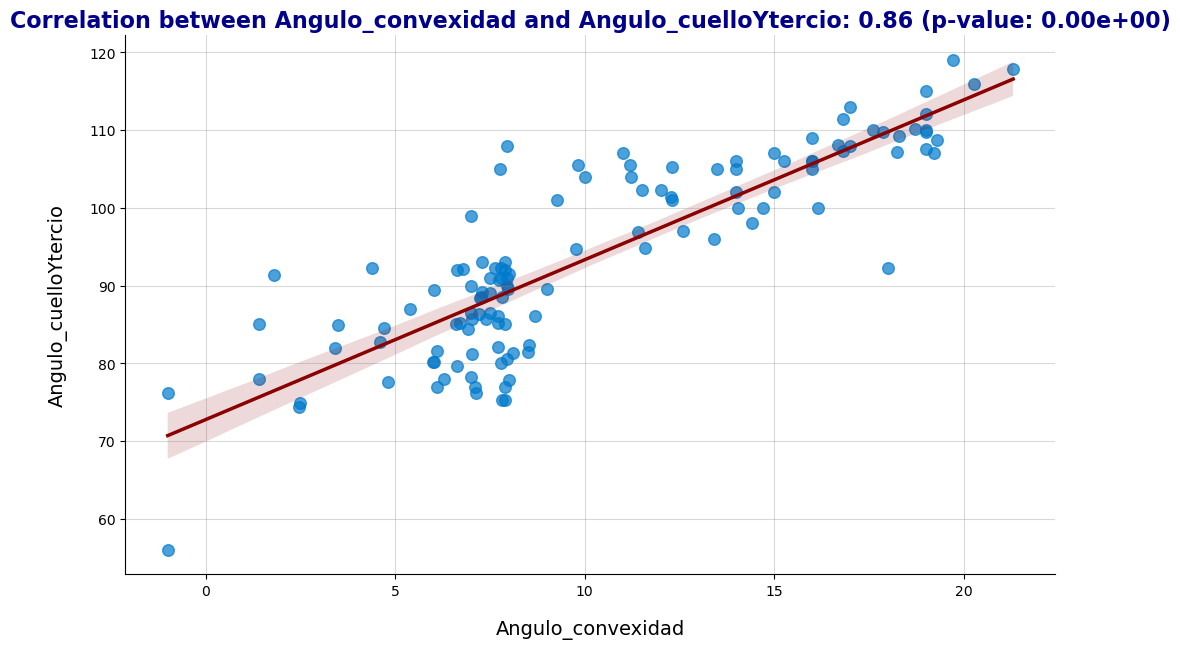

In [18]:
# Calculate the correlation
correlation = df['Angulo_convexidad'].corr(df['Angulo_cuelloYtercio'])
print(f"Correlation: {correlation}")

# Compute the p-value
n = df[['Angulo_convexidad', 'Angulo_cuelloYtercio']].dropna().shape[0]
t_stat = correlation * np.sqrt((n - 2) / (1 - correlation**2))
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))
print(f"P-value: {p_value}")

# Create figure and axis with larger dimensions for clarity
plt.figure(figsize=(12, 7), dpi=100)

# Scatterplot with regression line
sns.regplot(x='Angulo_convexidad', y='Angulo_cuelloYtercio', data=df, 
            scatter_kws={'s': 70, 'alpha': 0.7, 'color': '#007acc'}, # Adjust scatter style
            line_kws={'color': 'darkred', 'lw': 2.5})                # Adjust regression line style

# Title and labels with enhanced font properties
plt.title(f'Correlation between Angulo_convexidad and Angulo_cuelloYtercio: {correlation:.2f} (p-value: {p_value:.2e})',
          fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Angulo_convexidad', fontsize=14, labelpad=15)
plt.ylabel('Angulo_cuelloYtercio', fontsize=14, labelpad=15)

# Lighten grid and remove top/right spines for a cleaner look
plt.grid(True, color='gray', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.show()
